In [2]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import numpy as np # linear algebra
print("NumPy version: {}". format(np.__version__))
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print("pandas version: {}". format(pd.__version__))
import matplotlib # collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.24.3
pandas version: 2.0.3
matplotlib version: 3.7.2


In [3]:
df = pd.read_csv('merged_dataset.csv')
df.shape

(1943, 10)

In [4]:
df.head(3)

df.drop(columns=['ST_Slope'], inplace=True)

In [5]:
df.HeartDisease.value_counts() # df.target.unique()

HeartDisease
1    1034
0     909
Name: count, dtype: int64

In [6]:
disease = len(df[df['HeartDisease'] == 1])
no_disease = len(df[df['HeartDisease']== 0])

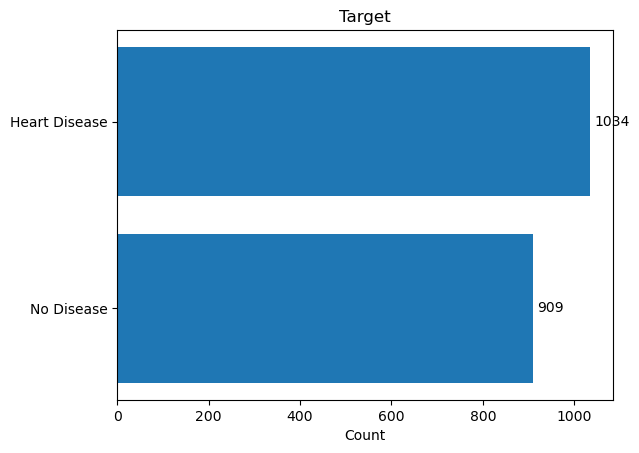

In [7]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

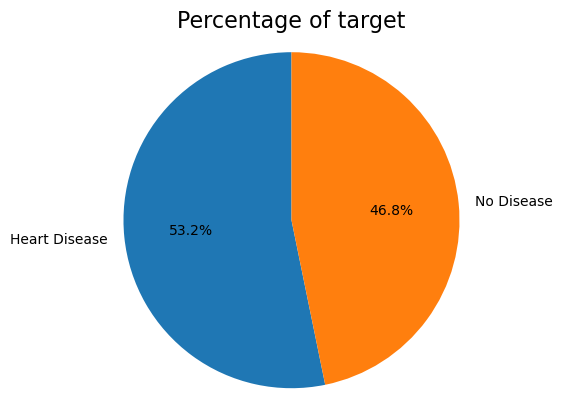

In [8]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:


In [9]:
df.isnull().sum() # missing values

Age               0
Sex               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
dtype: int64

In [10]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [11]:
qualitative

['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']

In [12]:
quantitative

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

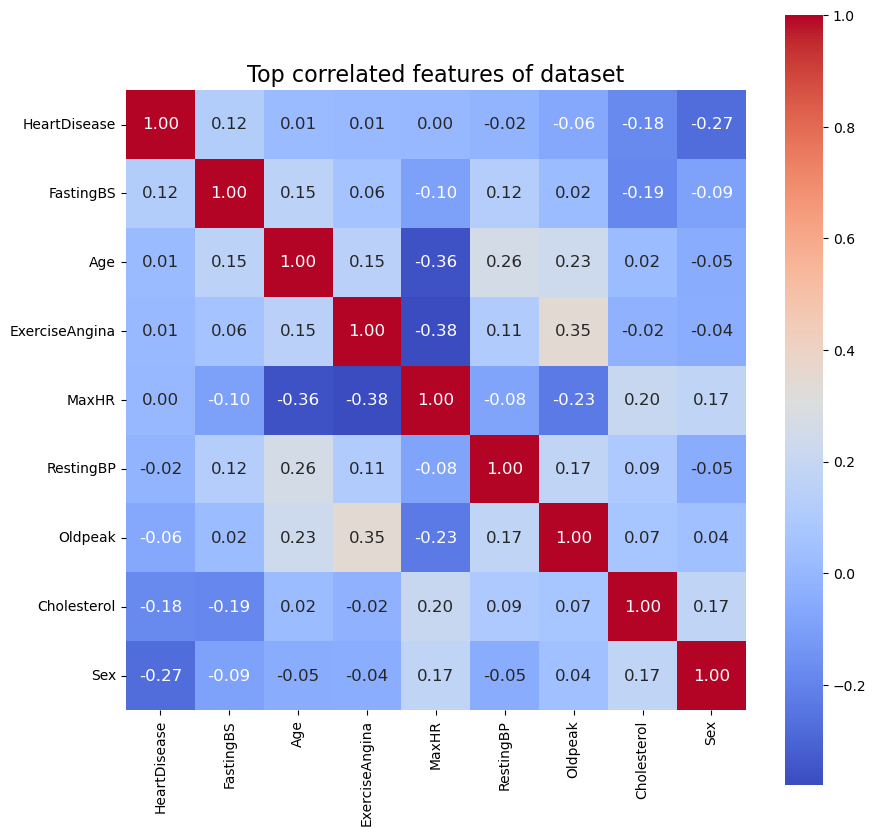

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [13]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'HeartDisease')['HeartDisease'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""


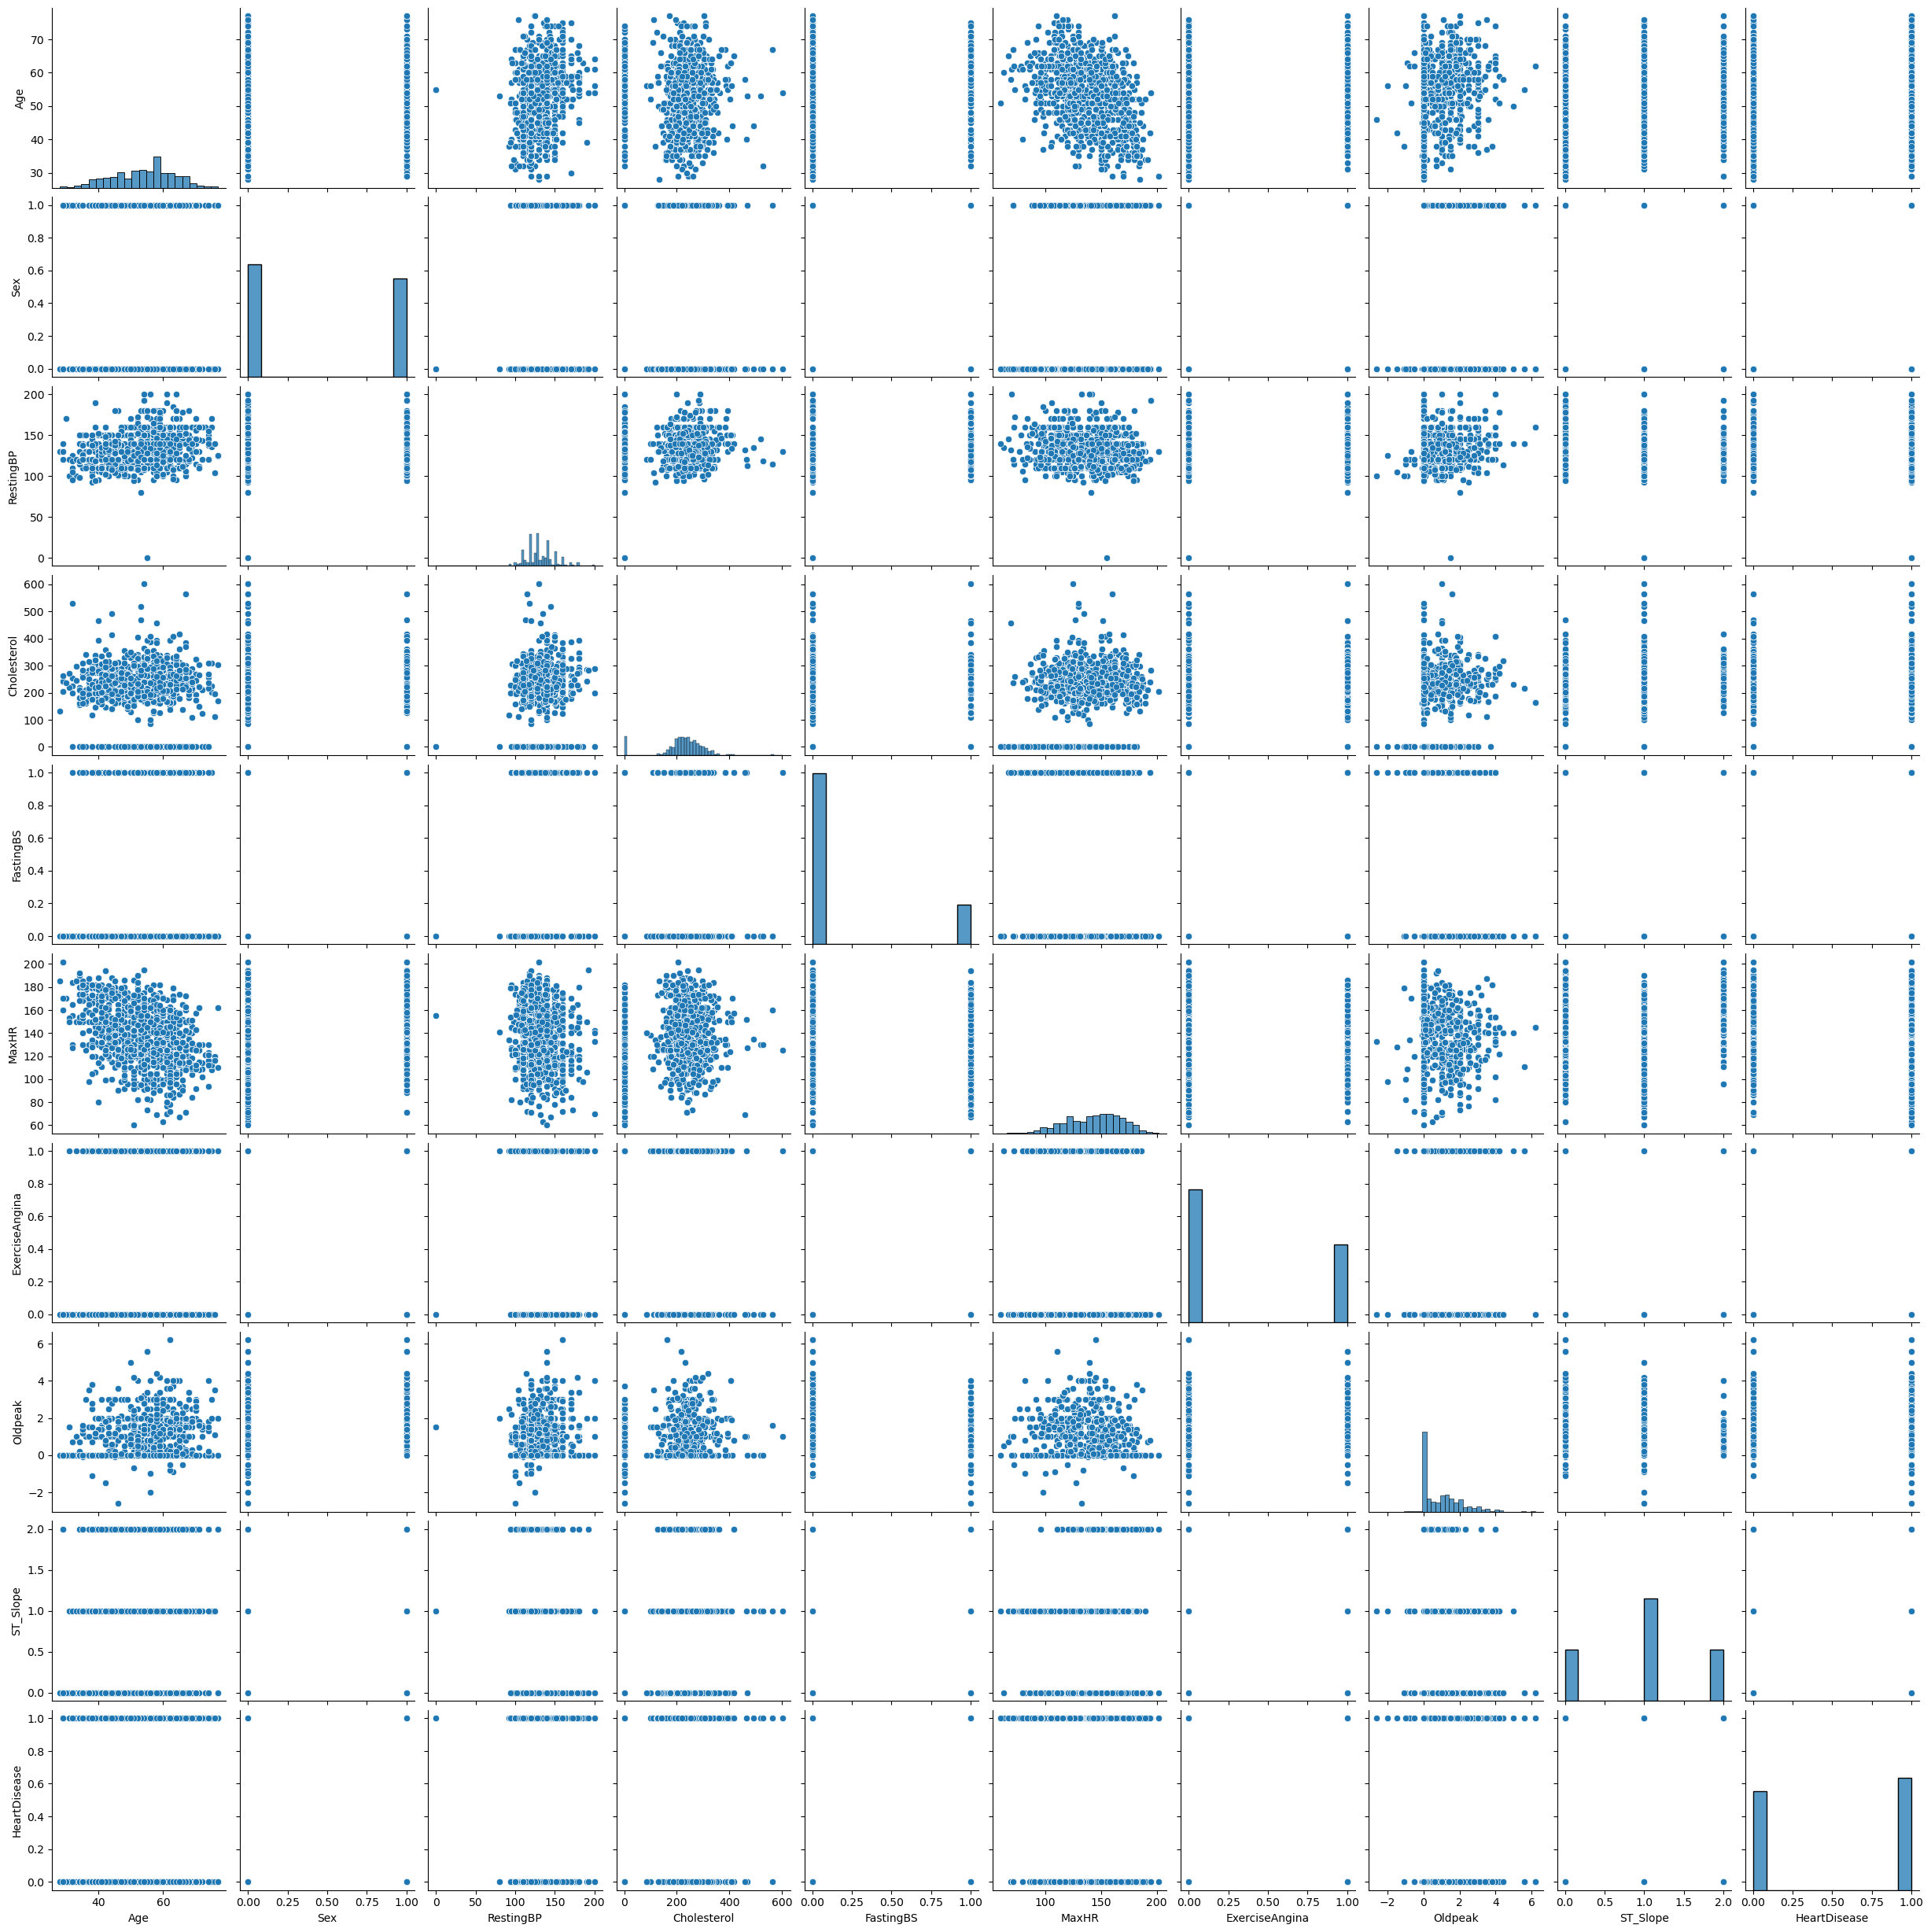

In [13]:
sns.pairplot(df)

In [14]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1943, 8) (1943,)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (1554, 8) (1554,)
shape of X and y respectively (test) : (389, 8) (389,)


In [38]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression

# Define the best parameters
best_params = {'C': 1, 'solver': 'lbfgs', 'max_iter': 1000}

# Create LogisticRegression with best parameters
model = LogisticRegression(**best_params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate and print training score
score_train = model.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_test = model.score(X_test, y_test)
print('Testing Score:', score_test)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

Logistic Regression
Training Score: 0.6338481338481339
Testing Score: 0.6375321336760925
% of people predicted with heart-disease: 0.532133676092545
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       177
           1       0.67      0.66      0.66       212

    accuracy                           0.64       389
   macro avg       0.64      0.64      0.64       389
weighted avg       0.64      0.64      0.64       389



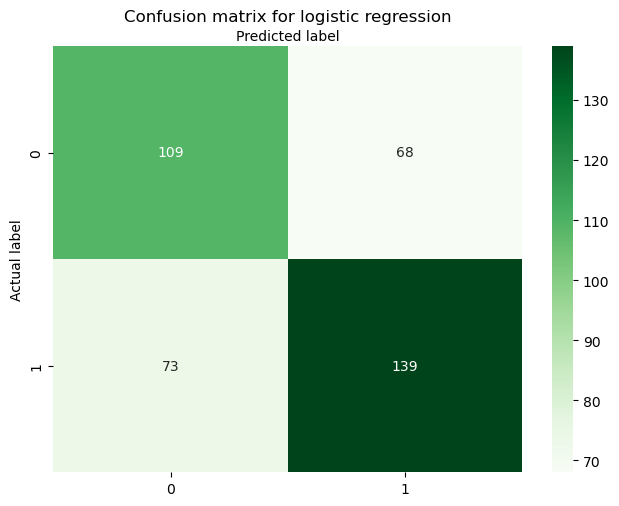

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

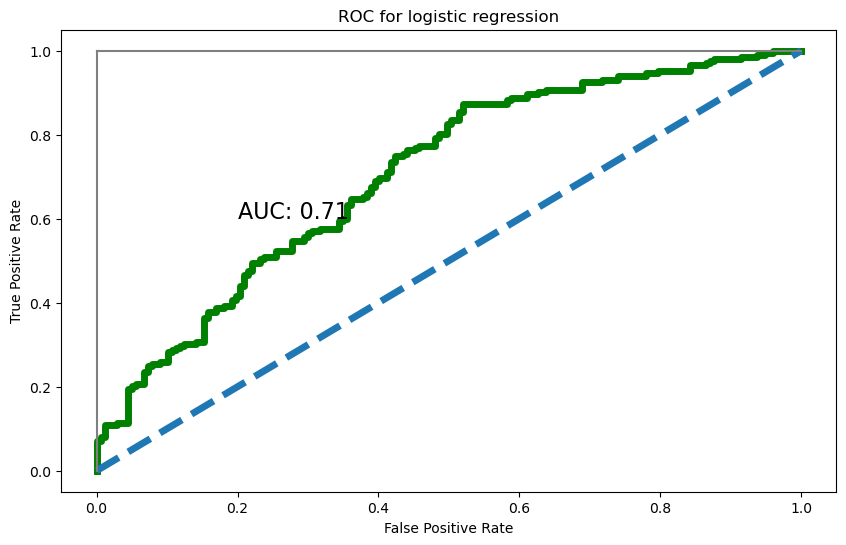

In [40]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with the best parameters
best_params = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
decision_tree = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
Y_pred = decision_tree.predict(X_test)

# Calculate and print training score
train_score = decision_tree.score(X_train, y_train)
print('Training Score:', train_score)

# Calculate and print testing score
score_dtc = decision_tree.score(X_test, y_test)
print('Testing Score:', score_dtc)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


DecisionTreeClassifier
Training Score: 0.9272844272844273
Testing Score: 0.8071979434447301
% of people predicted with heart-disease: 0.5938303341902313
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       177
           1       0.80      0.87      0.83       212

    accuracy                           0.81       389
   macro avg       0.81      0.80      0.80       389
weighted avg       0.81      0.81      0.81       389



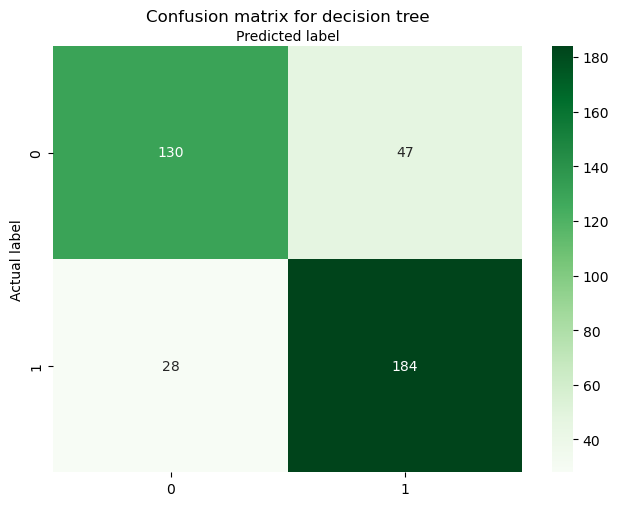

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

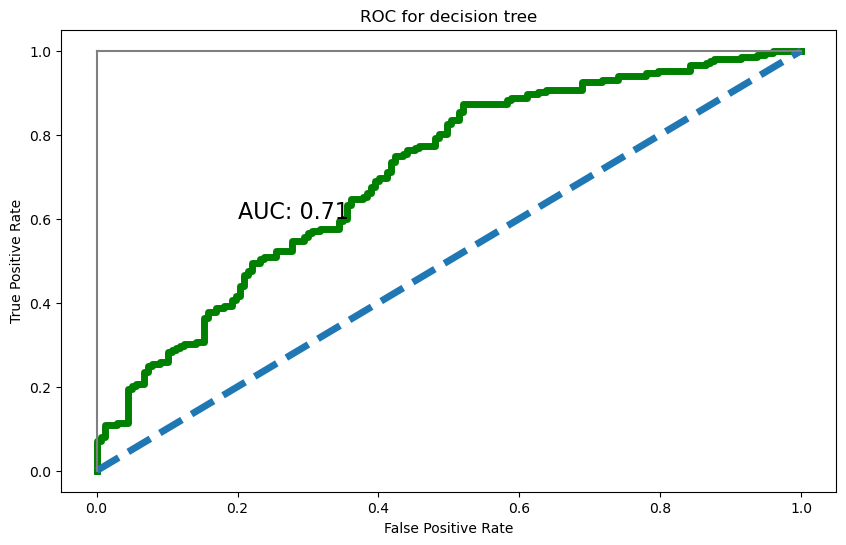

In [43]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [44]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with the best parameters
best_params = {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
rf_model = RandomForestClassifier(**best_params)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
Y_pred = rf_model.predict(X_test)

# Calculate and print training score
score_train = rf_model.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_rfc = rf_model.score(X_test, y_test)
print('Testing Score:', score_rfc)

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


RandomForestClassifier
Training Score: 0.9993564993564994
Testing Score: 0.8637532133676092
% of people predicted with heart-disease: 0.5681233933161953
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       177
           1       0.86      0.90      0.88       212

    accuracy                           0.86       389
   macro avg       0.86      0.86      0.86       389
weighted avg       0.86      0.86      0.86       389



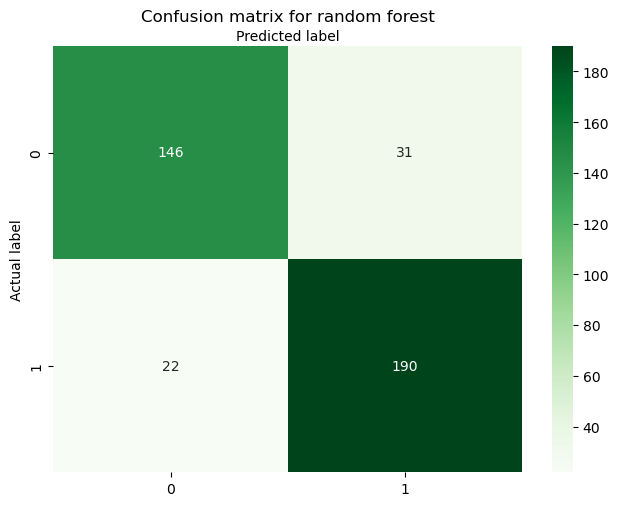

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

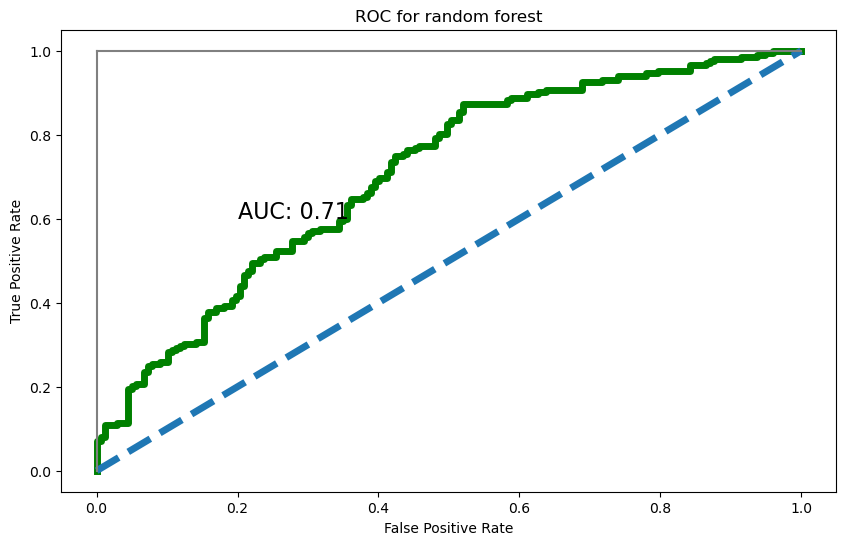

In [46]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best parameters
best_params = {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

# Create KNeighborsClassifier with best parameters
best_knc = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knc.fit(X_train, y_train)

# Make predictions on the testing data
Y_pred = best_knc.predict(X_test)

# Calculate and print training score
score_train = best_knc.score(X_train, y_train)
print('Training Score:', score_train)

# Calculate and print testing score
score_knc = best_knc.score(X_test, y_test)
print('Testing Score:', score_knc)  # Here, score_knc is calculated

# Create DataFrame for predictions
output = pd.DataFrame({'Predicted': Y_pred})

# Calculate percentage of people predicted with heart disease
rate_people = len(output[output['Predicted'] == 1]) / len(output)
print("% of people predicted with heart-disease:", rate_people)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))


Training Score: 1.0
Testing Score: 0.7506426735218509
% of people predicted with heart-disease: 0.5578406169665809
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       177
           1       0.76      0.78      0.77       212

    accuracy                           0.75       389
   macro avg       0.75      0.75      0.75       389
weighted avg       0.75      0.75      0.75       389



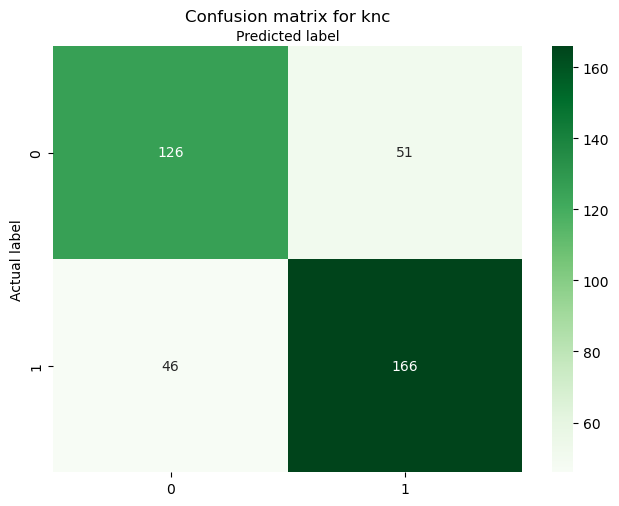

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


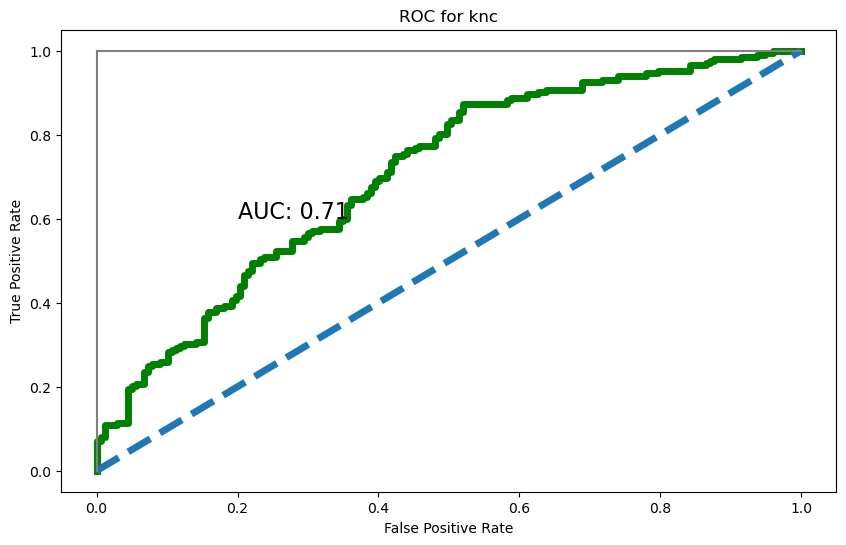

In [49]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for knc')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


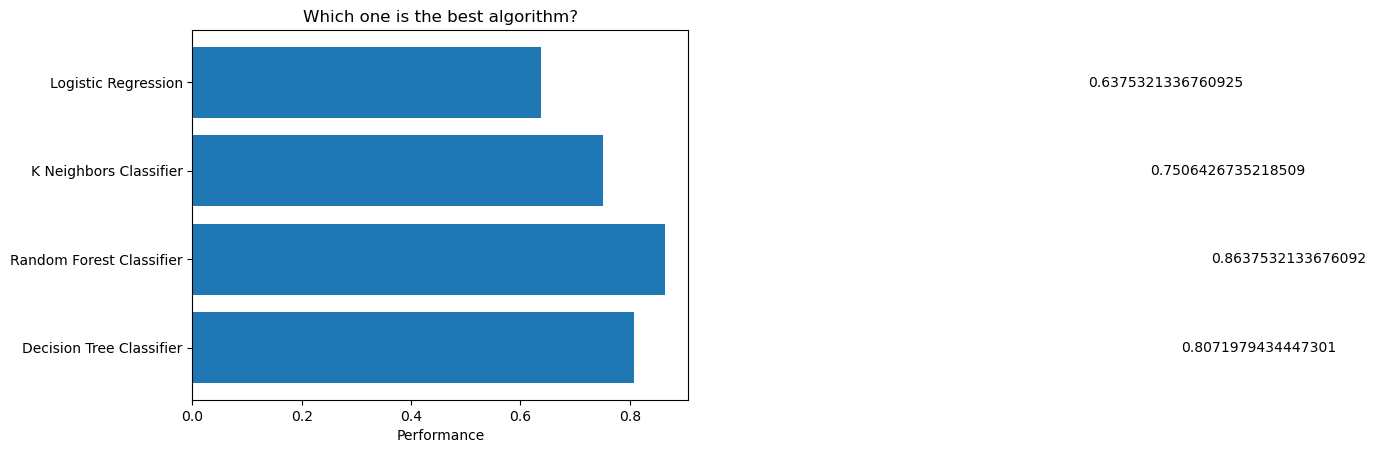

In [51]:
score_logreg = score_test 
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

NameError: name 'out_logreg' is not defined

In [53]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_logreg]
results.loc['Decision Tree Classifier']=[score_dtc]
results.loc['Random Forest Classifier']=[score_rfc]
results.loc['K-Neighbors Classifier']=[score_knc]

In [54]:
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Random Forest Classifier,0.863753
Decision Tree Classifier,0.807198
K-Neighbors Classifier,0.750643
Logistic Regression,0.637532


In [55]:
import pickle
with open('rf_classifier2.pkl','wb') as file:
    pickle.dump(rf_model,file)
